In [2]:
import pandas as pd
import nltk

In [3]:
data=pd.read_csv("abcnews.csv")

In [4]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
docs=data['headline_text'].str.lower()
docs.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [30]:
data['publish_date'] = data['publish_date'].astype(str)

In [34]:
s=[]
for i in data["publish_date"]:
    k= pd.Series(pd.date_range(i, periods=1))
    s.append(k)

In [43]:
data.head()

,publish_date,headline_text,dates
0,20030219,aba decides against community broadcasting lic...,0 2003-02-19 dtype: datetime64[ns]
1,20030219,act fire witnesses must be aware of defamation,0 2003-02-19 dtype: datetime64[ns]
2,20030219,a g calls for infrastructure protection summit,0 2003-02-19 dtype: datetime64[ns]
3,20030219,air nz staff in aust strike for pay rise,0 2003-02-19 dtype: datetime64[ns]
4,20030219,air nz strike to affect australian travellers,0 2003-02-19 dtype: datetime64[ns]


In [48]:
data.dtypes

publish_date     object
headline_text    object
dates            object
dtype: object

In [51]:
#df5 = data.apply(lambda x: x["dates"].split(" "), axis=1)
#df5.columns=["index","drugs"]
#df5.head()

In [52]:
docs.str.replace('the','-').head() # replace the with -
docs.str.replace('rt','').head() # remove rt
docs.str.replace('[a-z]','').head()
docs.str.replace('[0-9]','').head() 

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [53]:
docs.str.replace('[^a-z ]','').head() # retain all alphabets with spaces

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

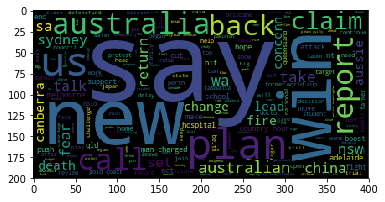

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [ ]:
#futher cleaning

In [57]:
#nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [58]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

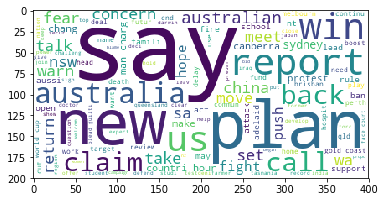

In [59]:
wc=WordCloud(background_color="white").generate(' '.join(docs_clean))
plt.imshow(wc)